In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score,davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

In [145]:
df=pd.read_csv("C:/Users/varsh/Downloads/wine-clustering-extended.csv")

In [146]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               1005 non-null   float64
 1   Malic_Acid            1005 non-null   float64
 2   Ash                   1005 non-null   float64
 3   Ash_Alcanity          1005 non-null   float64
 4   Magnesium             1005 non-null   float64
 5   Total_Phenols         1005 non-null   float64
 6   Flavanoids            1005 non-null   float64
 7   Nonflavanoid_Phenols  1005 non-null   float64
 8   Proanthocyanins       1005 non-null   float64
 9   Color_Intensity       1005 non-null   float64
 10  Hue                   1005 non-null   float64
 11  OD280                 1005 non-null   float64
 12  Proline               1005 non-null   float64
dtypes: float64(13)
memory usage: 102.2 KB


In [148]:
df.columns.tolist()

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline']

In [149]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [150]:
df.duplicated().sum()

np.int64(0)

In [151]:
outlier_counts = {}
for col in df.columns:
    if df[col].dtype != "object": 
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]

        outlier_counts[col] = outliers.shape[0]



print("\nSummary of Outliers per Feature:")
print(pd.Series(outlier_counts))


Summary of Outliers per Feature:
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


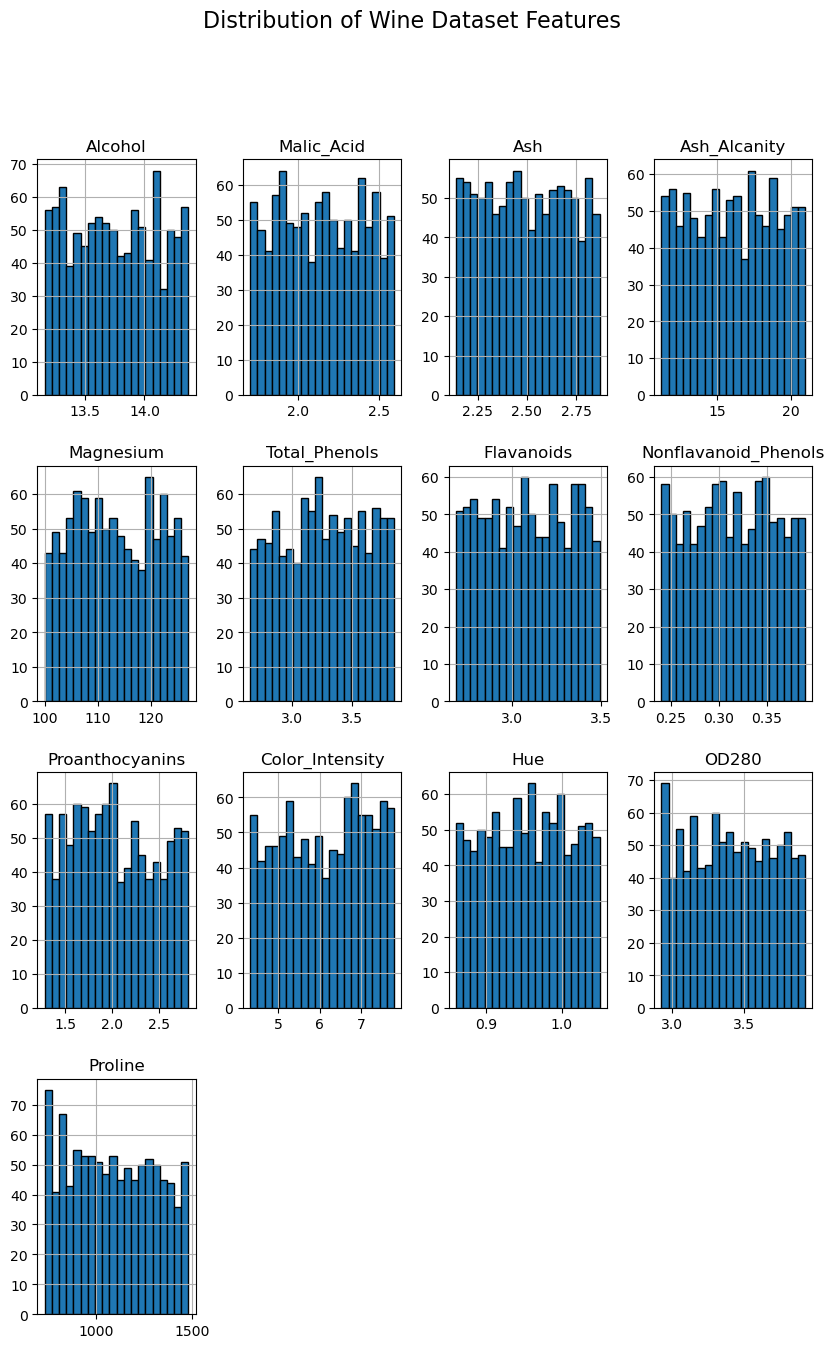

In [152]:
df.hist(figsize=(10,15),bins=20,edgecolor='black')
plt.suptitle("Distribution of Wine Dataset Features", fontsize=16)
plt.show()

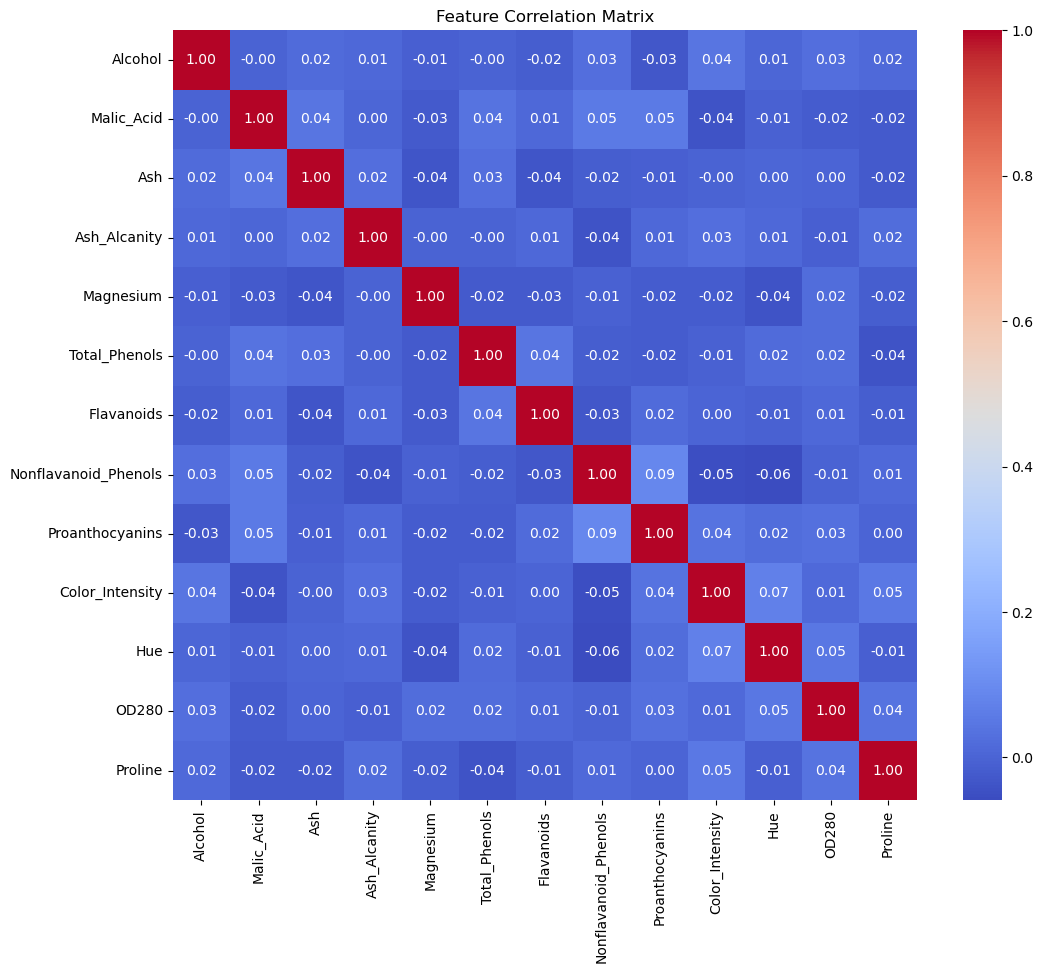

In [153]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [155]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [156]:

best_score = -1
best_n = 0
scores = []

for n in range(2, df.shape[1] + 1): 
    pca = PCA(n_components=n, random_state=42)
    X_pca = pca.fit_transform(df)

    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_pca)
        sil = silhouette_score(X_pca, labels)
        scores.append((n, k, sil))

        if sil > best_score:
            best_score = sil
            best_n = n
            best_k = k

print(f"✅ Best PCA components: {best_n}, Best clusters: {best_k}, Silhouette score: {best_score:.4f}")



✅ Best PCA components: 2, Best clusters: 2, Silhouette score: 0.6249


In [157]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", np.sum(pca.explained_variance_ratio_))


Explained variance ratio: [9.98527031e-01 1.26328598e-03 1.73081506e-04 2.20491181e-05
 4.12204777e-06 2.67092366e-06 2.49144781e-06 1.73958340e-06
 1.35306290e-06 1.14549175e-06 9.29734087e-07 6.20910258e-08
 3.83419679e-08]
Total variance explained: 1.0000000000000004


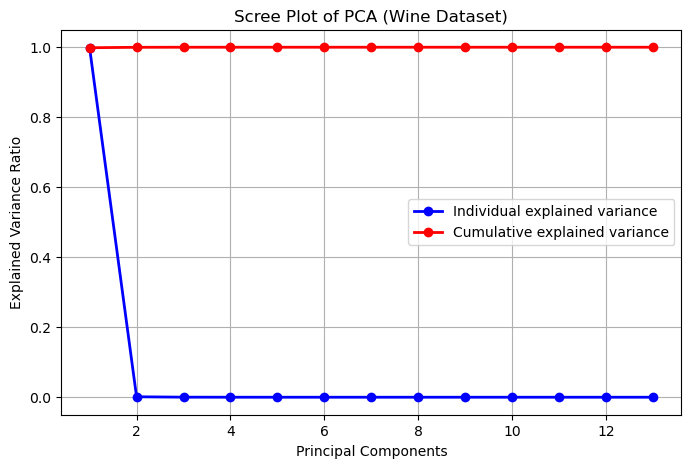

In [158]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_full = PCA(n_components=13, random_state=42)
pca_full.fit(df)

explained_variance = pca_full.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(range(1, 14), explained_variance, 'bo-', linewidth=2, label="Individual explained variance")
plt.plot(range(1, 14), explained_variance.cumsum(), 'ro-', linewidth=2, label="Cumulative explained variance")

plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot of PCA (Wine Dataset)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


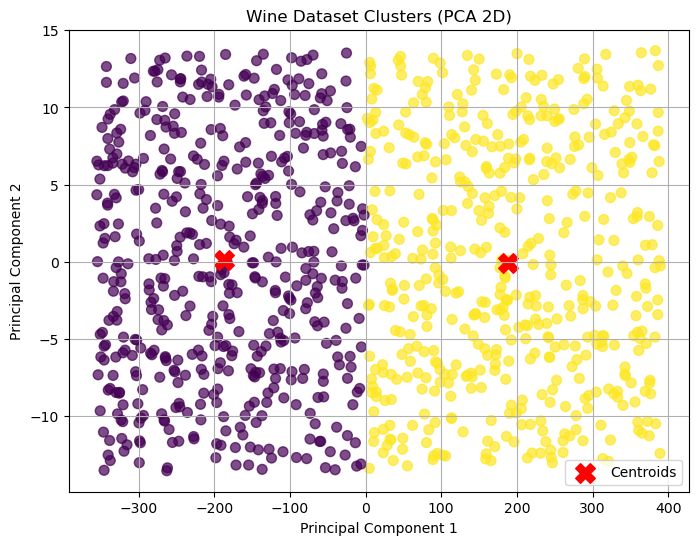

In [131]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label="Centroids")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Wine Dataset Clusters (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()


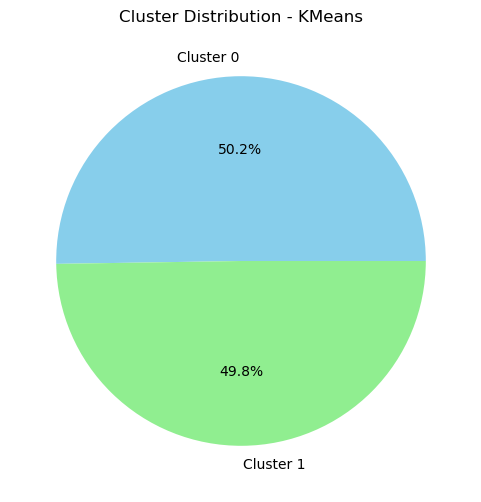

Silhouette Score: 0.6244577505791344
Davies-Bouldin Index: 0.5001160436232818
Calinski-Harabasz Index: 3001.5988289226884
Cluster Sizes: {np.int32(0): np.int64(505), np.int32(1): np.int64(500)}


In [159]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
labels = kmeans.fit_predict(df)

cluster_counts = pd.Series(labels).value_counts()
plt.figure(figsize=(6,6))
plt.pie(cluster_counts, labels=[f"Cluster {i}" for i in cluster_counts.index],
        autopct="%1.1f%%", colors=["skyblue","lightgreen","salmon"])
plt.title("Cluster Distribution - KMeans")
plt.show()

dbi=davies_bouldin_score(X_pca, labels)
chi=calinski_harabasz_score(X_pca, labels)
print("Silhouette Score:", silhouette_score(X_pca, labels))
print("Davies-Bouldin Index:", dbi)
print("Calinski-Harabasz Index:", chi)
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster Sizes:", cluster_sizes)

AGGLOMERATIVE CLUSTERING

      Algorithm  Silhouette     DBI        CHI  Clusters  Outliers  \
0  Hierarchical        0.62  0.4998  2912.7481         2         0   

      Cluster Sizes  
0  {0: 563, 1: 442}  


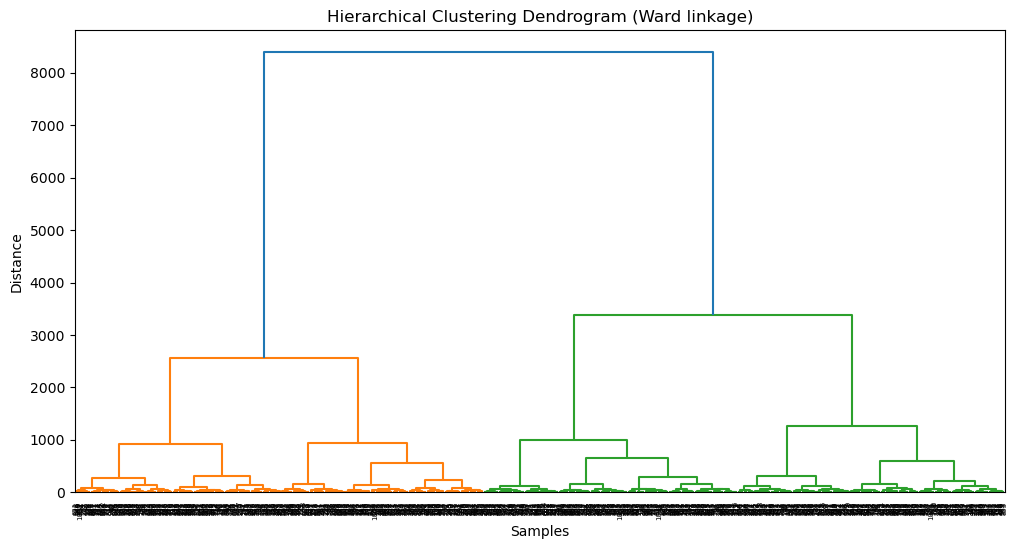

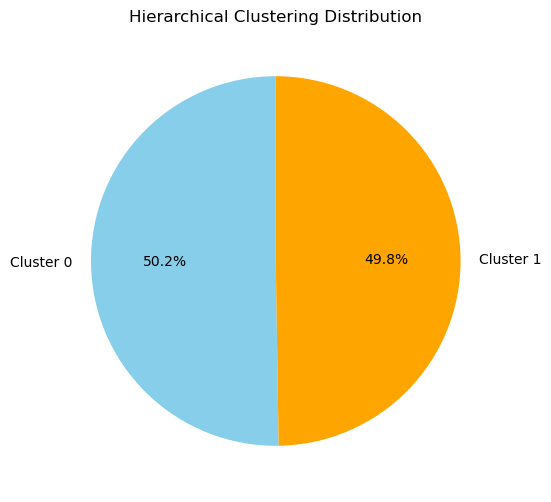

In [160]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
import pandas as pd

hierarchical = AgglomerativeClustering(n_clusters=2)
labels_hierarchical = hierarchical.fit_predict(X_pca)

silhouette = silhouette_score(X_pca, labels_hierarchical)
dbi = davies_bouldin_score(X_pca, labels_hierarchical)
chi = calinski_harabasz_score(X_pca, labels_hierarchical)

clusters = len(np.unique(labels_hierarchical))
outliers = list(labels_hierarchical).count(-1) if -1 in labels_hierarchical else 0
cluster_sizes = {c: list(labels_hierarchical).count(c) for c in np.unique(labels_hierarchical)}

hierarchical_result = pd.DataFrame([{
    "Algorithm": "Hierarchical",
    "Silhouette": round(silhouette, 4),
    "DBI": round(dbi, 4),
    "CHI": round(chi, 4),
    "Clusters": clusters,
    "Outliers": outliers,
    "Cluster Sizes": cluster_sizes
}])
print(hierarchical_result)

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12, 6))
dend = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=[f"Cluster {i}" for i in unique], autopct='%1.1f%%', startangle=90, colors=['skyblue','orange'])
plt.title("Hierarchical Clustering Distribution")
plt.show()


DBSCAN CLUSTERING

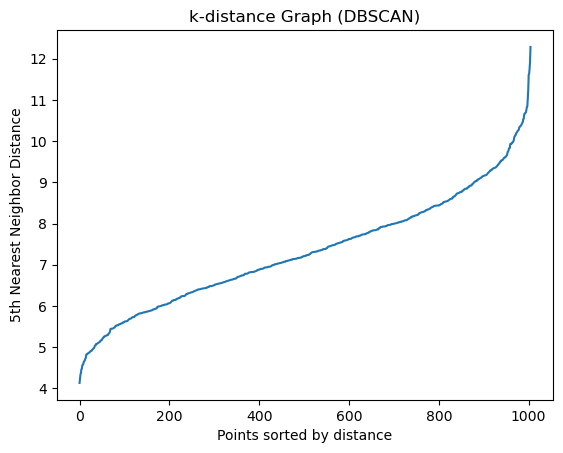

DBSCAN Results (eps=2.5, min_samples=5):
Clusters formed        : 0
Outliers detected      : 1005
Silhouette Score       : -1.000
Davies-Bouldin Index   : -1.000 (lower is better)
Calinski-Harabasz Index: -1.000 (higher is better)


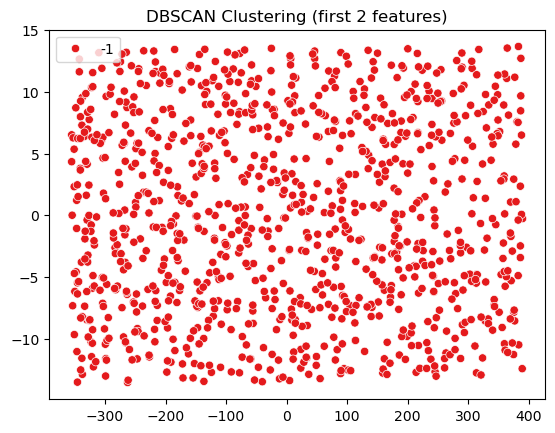

In [163]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
distances = np.sort(distances[:, 5])

plt.plot(distances)
plt.title("k-distance Graph (DBSCAN)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

db = DBSCAN(eps=2.15, min_samples=5)   
labels_db = db.fit_predict(X_pca)

clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
outliers_db = (labels_db == -1).sum()

if clusters_db > 1:  
    sil = silhouette_score(X_pca, labels_db)
    dbi = davies_bouldin_score(X_pca, labels_db)
    ch = calinski_harabasz_score(X_pca, labels_db)
else:
    sil, dbi, ch = -1, -1, -1

print(f"DBSCAN Results (eps=2.5, min_samples=5):")
print(f"Clusters formed        : {clusters_db}")
print(f"Outliers detected      : {outliers_db}")
print(f"Silhouette Score       : {sil:.3f}")
print(f"Davies-Bouldin Index   : {dbi:.3f} (lower is better)")
print(f"Calinski-Harabasz Index: {ch:.3f} (higher is better)")


sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_db, palette="Set1")
plt.title("DBSCAN Clustering (first 2 features)")
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

results = []


kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
labels_kmeans = kmeans.fit_predict(X_pca)
results.append({
    "Algorithm": "KMeans",
    "Silhouette": silhouette_score(X_pca, labels_kmeans),
    "DBI": davies_bouldin_score(X_pca, labels_kmeans),
    "CHI": calinski_harabasz_score(X_pca, labels_kmeans),
    "Clusters": len(set(labels_kmeans)),
    "Outliers": (labels_kmeans == -1).sum(), 
    "Cluster Sizes": dict(pd.Series(labels_kmeans).value_counts().sort_index())

})


agglo = AgglomerativeClustering(n_clusters=2, linkage="ward")
labels_hier = agglo.fit_predict(X_pca)
results.append({
    "Algorithm": "Hierarchical",
    "Silhouette": silhouette_score(X_pca, labels_hier),
    "DBI": davies_bouldin_score(X_pca, labels_hier),
    "CHI": calinski_harabasz_score(X_pca, labels_hier),
    "Clusters": len(set(labels_hier)),
    "Outliers": (labels_hier == -1).sum(), 
    "Cluster Sizes": dict(pd.Series(labels_hier).value_counts().sort_index())
})

db = DBSCAN(eps=2.125, min_samples=5)
labels_db = db.fit_predict(X_pca)

clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
outliers_db = (labels_db == -1).sum()

if clusters_db > 1:
    sil = silhouette_score(X_pca, labels_db)
    dbi = davies_bouldin_score(X_pca, labels_db)
    chi = calinski_harabasz_score(X_pca, labels_db)
else:
    sil, dbi, chi = -1, -1, -1

results.append({
    "Algorithm": "DBSCAN",
    "Silhouette": sil,
    "DBI": dbi,
    "CHI": chi,
    "Clusters": clusters_db,
    "Outliers": outliers_db,
    "Cluster Sizes": dict(pd.Series(labels_db[labels_db != -1]).value_counts().sort_index())
})
report = pd.DataFrame(results)
print(report)


      Algorithm  Silhouette       DBI          CHI  Clusters  Outliers  \
0        KMeans    0.624458  0.500116  3001.598829         2         0   
1  Hierarchical    0.619965  0.499790  2912.748085         2         0   
2        DBSCAN   -1.000000 -1.000000    -1.000000         0      1005   

      Cluster Sizes  
0  {0: 505, 1: 500}  
1  {0: 563, 1: 442}  
2                {}  
